In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('../data/heart_disease.csv')
data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [5]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')

In [6]:
remaining_categorical = [col for col in categorical_features if col != 'Alcohol Consumption']

In [7]:
imputer = sklearn.impute.SimpleImputer(strategy='most_frequent')
imputer

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [8]:
print("Missing values in categorical features:")
print(data[categorical_features].isnull().sum())

print("\nDistribution of Alcohol Consumption before imputation:")
print(data['Alcohol Consumption'].value_counts(dropna=False))

Missing values in categorical features:
Gender                    19
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sugar Consumption         30
Heart Disease Status       0
dtype: int64

Distribution of Alcohol Consumption before imputation:
Alcohol Consumption
NaN       2586
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64


In [9]:
le = LabelEncoder()
original_alcohol = data['Alcohol Consumption'].copy()
non_null_mask = original_alcohol.notnull()
data.loc[non_null_mask, 'Alcohol Consumption'] = le.fit_transform(original_alcohol[non_null_mask])
related_features = [
    'Age', 'Exercise Habits', 'Stress Level', 
    'Smoking', 'Gender'
]
temp_data = data[related_features].copy()
for col in temp_data.select_dtypes(include=['object']):
    temp_data[col] = LabelEncoder().fit_transform(temp_data[col])
temp_data['Alcohol Consumption'] = data['Alcohol Consumption']

In [10]:
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer

,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [11]:
imputed_values = knn_imputer.fit_transform(temp_data)

In [12]:
encoded_alcohol = np.rint(imputed_values[:, -1]).astype(int)

In [13]:
data['Alcohol Consumption'] = le.inverse_transform(encoded_alcohol)

In [14]:
data['Alcohol Consumption'].value_counts(dropna=False)

Alcohol Consumption
Low       4594
High      2703
Medium    2703
Name: count, dtype: int64

In [15]:
print("\nDistribution of Alcohol Consumption after KNN imputation:")
print(data['Alcohol Consumption'].value_counts(dropna=False))


Distribution of Alcohol Consumption after KNN imputation:
Alcohol Consumption
Low       4594
High      2703
Medium    2703
Name: count, dtype: int64


In [16]:
imputer.fit(data[remaining_categorical])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [17]:
data[remaining_categorical] = pd.DataFrame(
        data = imputer.transform(data[remaining_categorical]),
        columns = remaining_categorical,
        index = data.index
    )

In [18]:
print("Categorical features after imputation:")
print("\nMissing values:")
print(data[categorical_features].isnull().sum())

Categorical features after imputation:

Missing values:
Gender                  0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sugar Consumption       0
Heart Disease Status    0
dtype: int64


In [19]:
data.isnull().sum()

Age                     29
Gender                   0
Blood Pressure          19
Cholesterol Level       30
Exercise Habits          0
Smoking                  0
Family Heart Disease     0
Diabetes                 0
BMI                     22
High Blood Pressure      0
Low HDL Cholesterol      0
High LDL Cholesterol     0
Alcohol Consumption      0
Stress Level             0
Sleep Hours             25
Sugar Consumption        0
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

In [20]:
onehot_features = [
    'Gender', 
    'Smoking', 
    'Family Heart Disease', 
    'Diabetes', 
    'High Blood Pressure', 
    'Low HDL Cholesterol', 
    'High LDL Cholesterol', 
    
    ]

onehot_mapping = [
    ('Male', 'Female'),
    ('No', 'Yes'),
    ('No', 'Yes'),
    ('No', 'Yes'),
    ('No', 'Yes'),
    ('No', 'Yes'),
    ('No', 'Yes'),
   
]

ordinal_features = [
    'Exercise Habits',
    'Alcohol Consumption',
    'Stress Level',
    'Sugar Consumption'
]

ordinal_mapping = [
     ('Low', 'Medium', 'High'),
    ('Low', 'Medium', 'High'),
    ('Low', 'Medium', 'High'),
    ('Low', 'Medium', 'High')
]

mapping = {
    'Heart Disease Status': {
        'No': 0,
        'Yes': 1
    }
}

In [21]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=onehot_mapping, sparse_output=False)
onehot_encoder

,categories,"[('Male', ...), ('No', ...), ...]"
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [22]:
onehot_encoder.fit(data[onehot_features])

,categories,"[('Male', ...), ('No', ...), ...]"
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [23]:
onehot_encoder.get_feature_names_out()

array(['Gender_Male', 'Gender_Female', 'Smoking_No', 'Smoking_Yes',
       'Family Heart Disease_No', 'Family Heart Disease_Yes',
       'Diabetes_No', 'Diabetes_Yes', 'High Blood Pressure_No',
       'High Blood Pressure_Yes', 'Low HDL Cholesterol_No',
       'Low HDL Cholesterol_Yes', 'High LDL Cholesterol_No',
       'High LDL Cholesterol_Yes'], dtype=object)

In [24]:
data_onehot_features = pd.DataFrame(
        data = onehot_encoder.transform(data[onehot_features]),
        columns = onehot_encoder.get_feature_names_out(),
        index = data.index  
    )
data_onehot_features

,Gender_Male,Gender_Female,Smoking_No,Smoking_Yes,Family Heart Disease_No,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9996,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
9998,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [25]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder

,categories,"[('Low', ...), ('Low', ...), ...]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [26]:
ordinal_encoder.fit(data[ordinal_features])

,categories,"[('Low', ...), ('Low', ...), ...]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [27]:
ordinal_encoder.get_feature_names_out()

array(['Exercise Habits', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption'], dtype=object)

In [28]:
data_ordinal_features = pd.DataFrame(
        data = ordinal_encoder.transform(data[ordinal_features]),
        columns = ordinal_features,
        index = data.index
    )
data_ordinal_features

,Exercise Habits,Alcohol Consumption,Stress Level,Sugar Consumption
0,2.0,2.0,1.0,1.0
1,2.0,1.0,2.0,1.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,2.0
4,0.0,0.0,2.0,2.0
...,...,...,...,...
9995,1.0,1.0,2.0,1.0
9996,1.0,0.0,2.0,0.0
9997,2.0,0.0,0.0,0.0
9998,0.0,1.0,2.0,1.0


In [29]:
mapping = pd.DataFrame(
    data = data.replace(mapping),
    columns = ['Heart Disease Status'],
    index = data.index
)
mapping

/var/folders/pb/8b1j14m116723lhg0z_g3nnm0000gn/T/ipykernel_5898/2959585970.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(mapping),


,Heart Disease Status
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [30]:
categorical_features  = (
    data_onehot_features
    .join(data_ordinal_features)
)
categorical_features

,Gender_Male,Gender_Female,Smoking_No,Smoking_Yes,Family Heart Disease_No,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes,Exercise Habits,Alcohol Consumption,Stress Level,Sugar Consumption
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0
9996,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0
9997,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
9998,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0


In [31]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

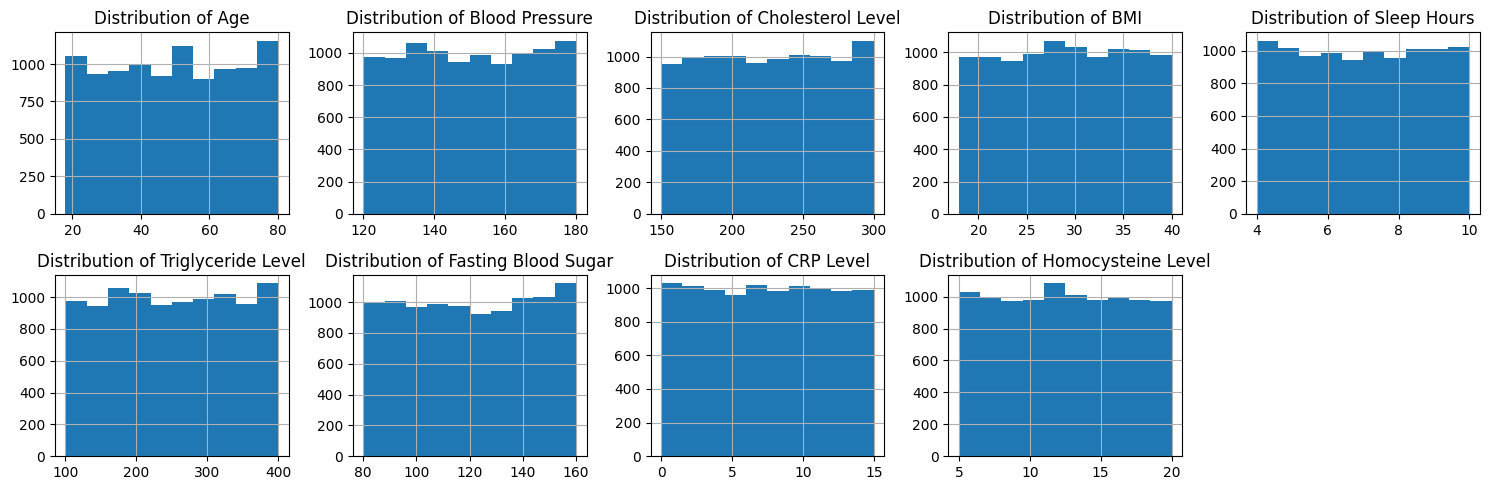


Missing values in numeric features:
Age                    29
Blood Pressure         19
Cholesterol Level      30
BMI                    22
Sleep Hours            25
Triglyceride Level     26
Fasting Blood Sugar    22
CRP Level              26
Homocysteine Level     20
dtype: int64


In [32]:
numeric_data_original = data[numeric_features].copy()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, len(numeric_features)//2 + 1, i)
    numeric_data_original[col].hist()
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

print("\nMissing values in numeric features:")
print(numeric_data_original.isnull().sum())

In [33]:
iterative_imputer = IterativeImputer(random_state=42, max_iter=10)
iterative_imputer

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


In [34]:
numeric_features_imputed = pd.DataFrame(
    iterative_imputer.fit_transform(numeric_data_original),
    columns=numeric_features,
    index=numeric_data_original.index
)

In [35]:
def cap_outliers(df, lower_pct=0.01, upper_pct=0.99):
    capped = df.copy()
    for col in numeric_features:          
        low = capped[col].quantile(lower_pct)
        high = capped[col].quantile(upper_pct)
        capped[col] = capped[col].clip(low, high)
    return capped

numeric_features_capped = cap_outliers(numeric_features_imputed)


In [36]:
print("\nMissing values after IterativeImputer:")
print(numeric_features_imputed.isnull().sum())

print("\nStatistics after imputation:")
numeric_features_imputed.describe()


Missing values after IterativeImputer:
Age                    0
Blood Pressure         0
Cholesterol Level      0
BMI                    0
Sleep Hours            0
Triglyceride Level     0
Fasting Blood Sugar    0
CRP Level              0
Homocysteine Level     0
dtype: int64

Statistics after imputation:


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.296182,149.757736,225.425584,29.077256,6.991318,250.734418,120.142227,7.472186,12.456251
std,18.167568,17.556266,43.510390,6.300158,1.751002,86.953954,23.558052,4.334602,4.319100
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.668887,5.455288,176.000000,99.000000,3.681800,8.729771
50%,49.000000,150.000000,225.448008,29.076235,7.000478,250.729637,120.000000,7.470659,12.417972
75%,65.000000,165.000000,263.000000,34.509009,8.527938,326.000000,141.000000,11.244879,16.130968
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [37]:
data = categorical_features.join(numeric_features_capped)
data_final = data.copy()
data_final

,Gender_Male,Gender_Female,Smoking_No,Smoking_Yes,Family Heart Disease_No,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,...,Sugar Consumption,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,56.0,153.0,155.0,24.991591,7.633228,342.0,120.22052,12.969246,12.387250
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,69.0,146.0,286.0,25.221799,8.744034,133.0,157.00000,9.355389,19.298875
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,46.0,126.0,216.0,29.855447,4.440440,393.0,92.00000,12.709873,11.230926
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,32.0,122.0,293.0,24.130477,5.249405,293.0,94.00000,12.509046,5.961958
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2.0,60.0,166.0,242.0,20.486289,7.030971,263.0,154.00000,10.381259,8.153887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,25.0,136.0,243.0,18.788791,6.834954,343.0,133.00000,3.588814,19.132004
9996,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,38.0,172.0,154.0,31.856801,8.247784,377.0,83.00000,2.658267,9.715709
9997,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,73.0,152.0,201.0,26.899911,4.436762,248.0,88.00000,4.408867,9.492429
9998,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,23.0,142.0,299.0,34.964026,8.526329,113.0,153.00000,7.215634,11.873486


In [38]:
scaler = RobustScaler()

data_final_scaled = pd.DataFrame(
    scaler.fit_transform(data_final),
    columns=data_final.columns,
    index=data_final.index
)
data_final_scaled


,Gender_Male,Gender_Female,Smoking_No,Smoking_Yes,Family Heart Disease_No,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,...,Sugar Consumption,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.225806,0.096774,-0.926947,-0.376808,0.205930,0.608469,0.005250,0.727030,-0.004151
1,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,0.0,0.645161,-0.129032,0.796737,-0.355571,0.567444,-0.784864,0.880952,0.249202,0.929702
2,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,...,-0.5,-0.096774,-0.774194,-0.124316,0.071882,-0.833169,0.948469,-0.666667,0.692736,-0.160386
3,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.5,-0.548387,-0.903226,0.888842,-0.456246,-0.569890,0.281802,-0.619048,0.666182,-0.872293
4,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,...,0.5,0.354839,0.516129,0.217789,-0.792422,0.009924,0.081802,0.809524,0.384843,-0.576134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.774194,-0.451613,0.230947,-0.949016,-0.053870,0.615136,0.309524,-0.513262,0.907155
9996,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,-0.354839,0.709677,-0.940105,0.256507,0.405938,0.841802,-0.880952,-0.636301,-0.365112
9997,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,...,-0.5,0.774194,0.064516,-0.321684,-0.200766,-0.834366,-0.018198,-0.761905,-0.404834,-0.395280
9998,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,-0.838710,-0.258065,0.967789,0.543148,0.496591,-0.918198,0.785714,-0.033720,-0.073567



Statistics after scaling:
       Gender_Male  Gender_Female    Smoking_No   Smoking_Yes  \
count  10000.00000    10000.00000  10000.000000  10000.000000   
mean      -0.49780        0.49780      0.485200     -0.485200   
std        0.50002        0.50002      0.499806      0.499806   
min       -1.00000        0.00000      0.000000     -1.000000   
25%       -1.00000        0.00000      0.000000     -1.000000   
50%        0.00000        0.00000      0.000000      0.000000   
75%        0.00000        1.00000      1.000000      0.000000   
max        0.00000        1.00000      1.000000      0.000000   

       Family Heart Disease_No  Family Heart Disease_Yes   Diabetes_No  \
count             10000.000000              10000.000000  10000.000000   
mean                 -0.497500                  0.497500     -0.495200   
std                   0.500019                  0.500019      0.500002   
min                  -1.000000                  0.000000     -1.000000   
25%              

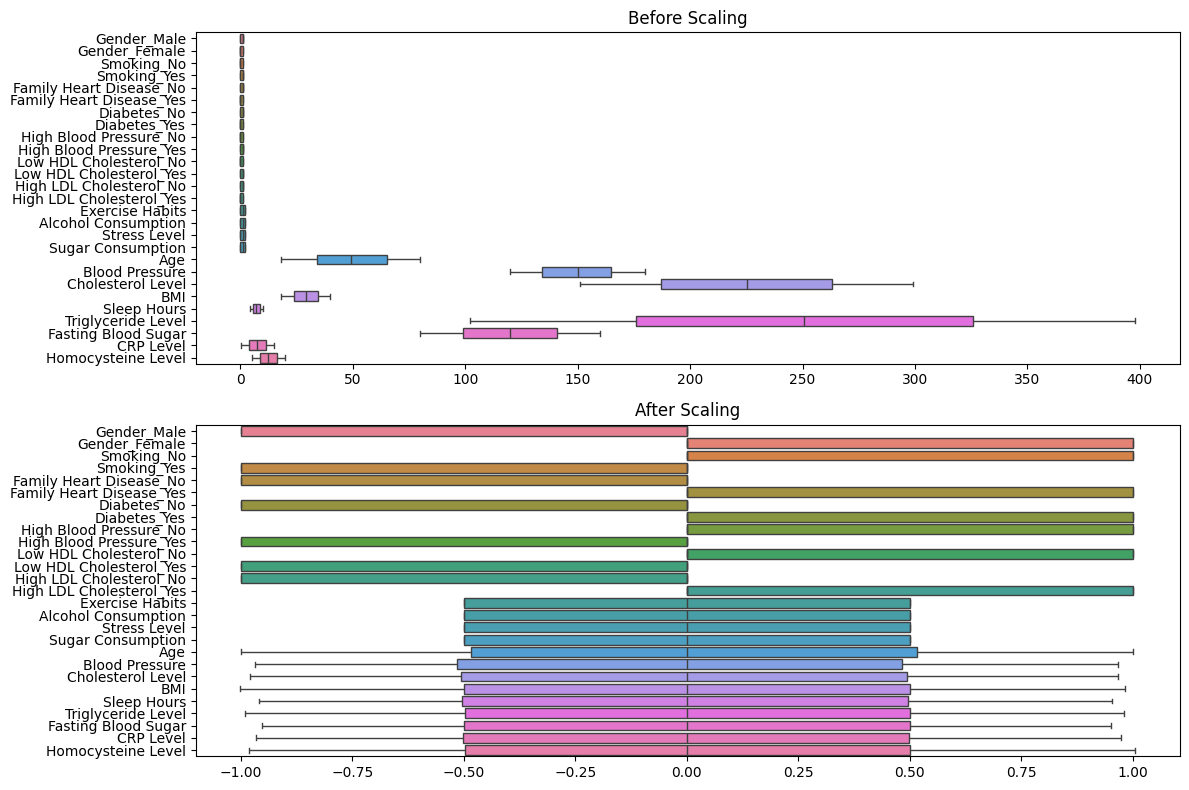

In [39]:
print("\nStatistics after scaling:")
print(data_final_scaled.describe())

# Box plot เปรียบเทียบก่อนและหลัง scaling
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ก่อน scaling
sns.boxplot(data=data_final, orient='h', ax=ax1)
ax1.set_title("Before Scaling")

# หลัง scaling
sns.boxplot(data=data_final_scaled, orient='h', ax=ax2)
ax2.set_title("After Scaling")

plt.tight_layout()
plt.show()

In [40]:
data = data_final_scaled.join(mapping)
data

,Gender_Male,Gender_Female,Smoking_No,Smoking_Yes,Family Heart Disease_No,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,...,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.225806,0.096774,-0.926947,-0.376808,0.205930,0.608469,0.005250,0.727030,-0.004151,0
1,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,0.645161,-0.129032,0.796737,-0.355571,0.567444,-0.784864,0.880952,0.249202,0.929702,0
2,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,...,-0.096774,-0.774194,-0.124316,0.071882,-0.833169,0.948469,-0.666667,0.692736,-0.160386,0
3,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,-0.548387,-0.903226,0.888842,-0.456246,-0.569890,0.281802,-0.619048,0.666182,-0.872293,0
4,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,...,0.354839,0.516129,0.217789,-0.792422,0.009924,0.081802,0.809524,0.384843,-0.576134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.774194,-0.451613,0.230947,-0.949016,-0.053870,0.615136,0.309524,-0.513262,0.907155,1
9996,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.354839,0.709677,-0.940105,0.256507,0.405938,0.841802,-0.880952,-0.636301,-0.365112,1
9997,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,...,0.774194,0.064516,-0.321684,-0.200766,-0.834366,-0.018198,-0.761905,-0.404834,-0.395280,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,...,-0.838710,-0.258065,0.967789,0.543148,0.496591,-0.918198,0.785714,-0.033720,-0.073567,1


In [41]:
x = data.drop('Heart Disease Status', axis=1)
y = data['Heart Disease Status']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
# รวมกลับเป็น DataFrame สำหรับการบันทึก
data_train = x_train.copy()
data_train['Heart Disease Status'] = y_train

data_test = x_test.copy()
data_test['Heart Disease Status'] = y_test

In [44]:
print('Train shape:', data_train.shape)
print('Test shape :', data_test.shape)

Train shape: (8000, 28)
Test shape : (2000, 28)


In [45]:
train_path = '../data/heart_disease_preprocessed_imput_train.csv'
test_path  = '../data/heart_disease_preprocessed_imput_test.csv'

data_train.to_csv(train_path, index=False)
data_test.to_csv(test_path, index=False)